In [5]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Clustering

## K-Means

This time we will use a "real" dataset (at last!), the iris dataset. It contains data about three different types of iris (setosa, versicolor, and virginica). Each point has four dimension, representing the sepal length, the sepal width, the petal length and the petal width (in centimeters).

We can load this dataset directly from scikit-learn.

In [6]:
from sklearn import datasets
iris_dataset = datasets.load_iris()

In [7]:
X_iris, y_iris = iris_dataset.data, iris_dataset.target
print(X_iris.shape, y_iris.shape)

(150, 4) (150,)


Let's quickly visualize this dataset using only the first two dimensions.

In [8]:
# We create a custom "colormap" so that elements with label 0 have color blue,
# elements with label 1 have color red and elements with label 2 have color green in our figure below.
from matplotlib.colors import ListedColormap
colormap = ListedColormap(['blue', 'red', 'green'])

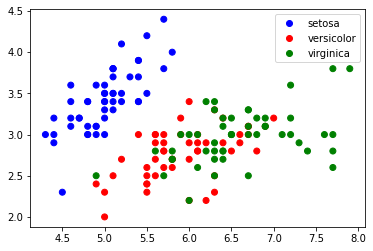

In [9]:
scatter = plt.scatter(X_iris[:,0], X_iris[:,1], c=y_iris, cmap=colormap)
plt.legend(scatter.legend_elements()[0], iris_dataset.target_names)
plt.show()

Now let's assume we don't have access to the labels, and see if we can still identify some structure in the dataset.

**Implement the K-Means algorithm and run it on the whole iris dataset using K=3.**

As all the features have roughly the same scale, we will consider there is no need to standardize features here.
(But I'm proud of you for immediately thinking about doing this! Right?)

In [10]:
from scipy.spatial import distance_matrix

def assign_clusters(points, clusters):
    distances = distance_matrix(points, clusters) # we compute pairwise distances between points and cluster centers
    cluster_assignments = np.argmin(distances, axis=1) # the assigned cluster correspond to the closest
    return cluster_assignments

In [11]:
def update_clusters(points, assignments, K=3):
    clusters = []
    for k in range(K):
        points_k = points[assignments==k]
        center = points_k.mean(axis=0)
        clusters.append(center)
    return np.array(clusters)

In [12]:
np.random.seed(43)

def kmeans(points, K=3):
    # we sample 3 points as initial clusters
    clusters = X_iris[np.random.choice(X_iris.shape[0], size=K, replace=True)]
    previous_assignments = assign_clusters(points, clusters)
    for i in range(1000): # we limit to 1000 iterations but we will converge in much fewer steps
        clusters = update_clusters(points, previous_assignments)
        assignments = assign_clusters(points, clusters)
        if (assignments == previous_assignments).all(): # we check if the assignments have changed
            print("Converged in {} iterations".format(i))
            break
        previous_assignments = assignments
    return assignments, clusters

In [13]:
assignments, clusters = kmeans(X_iris)

Converged in 9 iterations


**Display only the first 2 dimensions as in the figure above, and color points based on their assigned clusters. Do you have a result consistent with the figure above?**

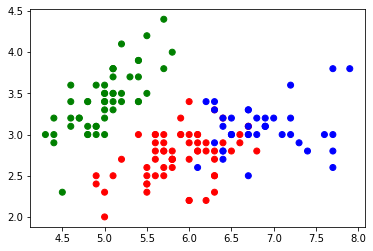

In [14]:
scatter = plt.scatter(X_iris[:,0], X_iris[:,1], c=assignments, cmap=colormap)
#plt.legend(scatter.legend_elements()[0], iris_dataset.target_names)
plt.show()

Now you may use the scikit-learn implementation sklearn.cluster.KMeans if you wish (you don't have to, but it will probably be easier with this class).

In [15]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(X_iris)

KMeans(n_clusters=3)

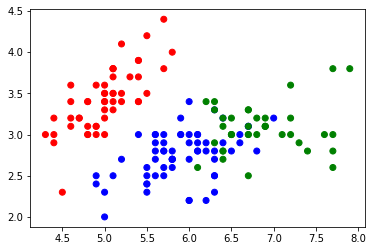

In [16]:
scatter = plt.scatter(X_iris[:,0], X_iris[:,1], c=km.labels_, cmap=colormap)
plt.show()

**Plot the "inertia" with respect to the number of clusters after running KMeans with different numbers of clusters. Here, "inertia" means the objective $\sum_{n=1}^N \lVert \mathbf{x}_n - \mathbf{c}_{a(\mathbf{x}_n)}\rVert_2^2$**

You don't have to compute the inertia manually, there is a way to obtain it directly if you look at the documentation of the class sklearn.cluster.KMeans.

In [17]:
inertias = []
n_clusters = range(2,10)
for i in n_clusters:
    km = KMeans(n_clusters=i)
    km.fit(X_iris)
    inertias.append(km.inertia_)

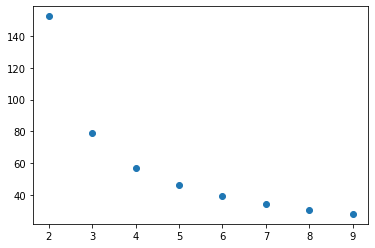

In [18]:
plt.scatter(n_clusters, inertias)
plt.show()

**If we didn't know how many clusters we needed, could be infer this number from this figure?**

*There is an "elbow" around 4, so values around this number may be a good number of clusters.*

**Did you think about running KMeans several times to make sure we don't obtain different results (and thus different inertia) for a given number of clusters?**

Don't actually bother showing me that you did, it won't be graded anyway. But I'm also proud of you for immediately thinking about doing this!

## Probably not K-Means

Let's go back to generating some data.

In [19]:
X_moons, y_moons = sklearn.datasets.make_moons(n_samples=200, shuffle=True, noise=0.05, random_state=42)

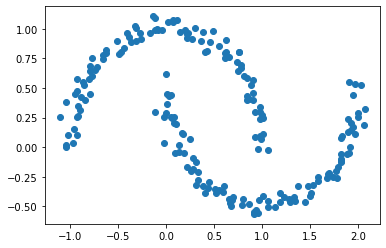

In [20]:
plt.scatter(X_moons[:,0], X_moons[:,1])
plt.show()

**How many groups of points would a human probably identify here?**

*2*

**Use a suitable clustering algorithm to assign each point to a cluster. Plot the result.**

You can consider that we know in advance how many clusters we want to obtain. You can (and maybe should) use an existing implementation.

In [21]:
from sklearn.cluster import AgglomerativeClustering

In [22]:
hierarchical_clustering = AgglomerativeClustering(n_clusters=2, linkage='single')
hierarchical_clustering.fit(X_moons)

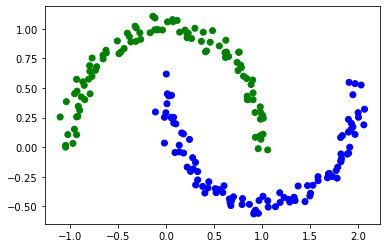

In [28]:
plt.scatter(X_moons[:,0], X_moons[:,1], c=hierarchical_clustering.labels_, cmap=colormap)
plt.show()

*Or alternatively*

In [29]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=3)
dbscan.fit(X_moons)

DBSCAN(eps=0.2, min_samples=3)

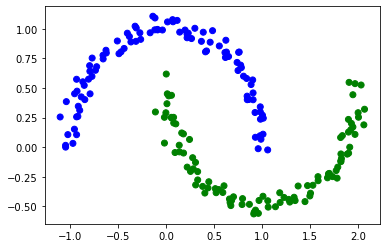

In [31]:
plt.scatter(X_moons[:,0], X_moons[:,1], c=dbscan.labels_, cmap=colormap)
plt.show()

# Dimensionality reduction

## Data visualization

We will now use the MNIST dataset. It consists of 28x28 pixels images of handwritten digits. We can directly download it in vector form from the scikit-learn API.

In [32]:
from sklearn.datasets import fetch_openml

In [33]:
%%time
# It may take up to a few minutes depending on the speed of the Internet connection, and the speed of your computer.
X_mnist, y_mnist = fetch_openml('mnist_784', version=1, return_X_y=True)
print(X_mnist.shape, y_mnist.shape)

(70000, 784) (70000,)
Wall time: 29.4 s


Let's have a look at the first image.

In [34]:
index = 0

In [35]:
print(X_mnist[index].shape)
print(y_mnist[index])

(784,)
5


It represents a five. It has an initial shape of 784, so we need to reshape it to correspond to an image.

In [36]:
img0 = X_mnist[index].reshape(28,28)

We can now display it.

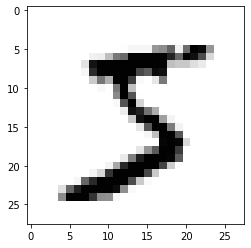

In [37]:
plt.imshow(img0, cmap=plt.cm.Greys)
plt.show()

You can have a look at a few other images if you want to.

Using all the 70,000 images may be a bit too much for some algorithms below. We will thus sample a subset of this dataset to speed up calculations.

In [38]:
# You can change this number depending on the speed of your computer.
# Try not to decrease it too much if you still want to get meaningful results.
N = 1000
X_samples = X_mnist[:N]
y_samples = y_mnist[:N]
X_samples.shape

(1000, 784)

We sampling data like this, it is important to check that the data has been shuffled. We wouldn't want to use 1000 images representing only the digit '0' for instance.

In [39]:
# The y_mnist array initially contains strings, we convert them to ints.
y_samples = np.array([int(s) for s in y_samples])

**Visualize the dataset in 2D using PCA. Display the digits as different colors.**

You don't have to print the legend. You should use the scikit-learn PCA implementation.

In [40]:
from sklearn.decomposition import PCA

In [41]:
pca = PCA(n_components=2)

In [42]:
X_reduced = pca.fit_transform(X_samples)

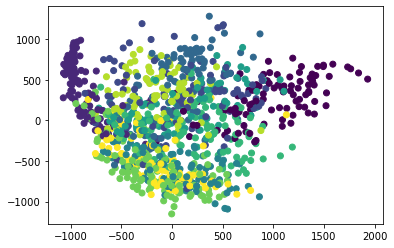

In [43]:
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y_samples)
plt.show()

**Are there any hyper-parameters? If yes, which one(s) did you choose?**.

*No. The number of components may be considered a h.p. in general, but here we are trying the visualize the dataset in 2D so we have to fix it to 2.*

**Now do the same things with t-SNE instead.**

In [45]:
from sklearn.manifold import TSNE

In [46]:
# Depending on the speed of your computer, this may take some time to run.
# Decrease the number of samples we use if it's taking too long.

In [47]:
tsne = TSNE(n_components=2, perplexity=30)

In [48]:
%%time
X_reduced = tsne.fit_transform(X_samples)

Wall time: 6.27 s


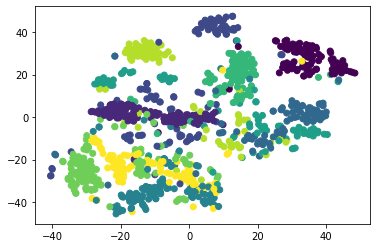

In [49]:
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y_samples)
plt.show()

**Are there any hyper-parameters? If yes, which one(s) did you choose?**.

*Yes, mostly 1, the perplexity in t-SNE. Qualitatively, 30 seems to give a correct result.*

**Does one algorithm seem to give "better" results than the other? If yes, which one? Why may that be?** 

*t-SNE seems better than PCA, as is usually the case for visualizing high-dimensional data. PCA is limited to modeling linear relationship between features, pixels here. In our case, the relations between pixels are not (only) linear, so it's not surprising that t-SNE produces a better result.*

## Data generation

We have seen that we are able to identify some structure in the data. Now let's use this structure to generate new samples!

We will generate some handwritten '5s' (you may pick another number if you prefer). First, let's collect all the fives from the dataset.

In [50]:
fives = X_mnist[y_mnist=='5']
fives.shape

(6313, 784)

**Use the PCA implementation from scikit-learn to obtain principal components for the handwritten digits representing '5'. Select the number of components such that they explain a bit more than 50% of the variance.**

Hint: some functions from the scikit-learn PCA implementation may help you.

In [51]:
for p in range(10):
    pca = PCA(n_components=p)
    fives_reduced = pca.fit_transform(fives)
    explained_variance = pca.explained_variance_ratio_.sum()
    print('Explained variance with {} components: {}'.format(p, explained_variance))

Explained variance with 0 components: 0.0
Explained variance with 1 components: 0.16657166292432576
Explained variance with 2 components: 0.26248778142856233
Explained variance with 3 components: 0.33273915565197776
Explained variance with 4 components: 0.383028662336105
Explained variance with 5 components: 0.42151140430289213
Explained variance with 6 components: 0.4545036828612405
Explained variance with 7 components: 0.48549207479106066
Explained variance with 8 components: 0.5102085400598653
Explained variance with 9 components: 0.5327156746089852


*We select 8 components.*

In [ ]:
pca = PCA(n_components=0.5)

In [56]:
P = 8
pca = PCA(n_components=P)
fives_reduced = pca.fit_transform(fives)

Remember that the principal components should be independant (or more exactly, uncorrelated). We can therefore sample independently along each axis, and combine the sampled vectors to approximately match the distribution of the dataset.

**Generate vectors along the principal components independently, and use them to generate representations of handwritten 5s.**

This is by far the hardest question you have met in this class (so far). Do not hesitate to ask for help.

I would actually be somewhat impressed if you managed to do this entirely on your own. And no, I'm just stating a fact, not challenging you.

*We start by generating some random noise with a mean of 0 and a standard deviation of 1*

In [57]:
np.random.seed(42)
noise = np.random.randn(P)

*We multiply these numbers by the sqrt of singular values to have a standard deviation corresponding to the standard deviation (square root of the variance) along each principal component.*

In [59]:
sigmas = noise * np.sqrt(pca.singular_values_)

*These are the generated coordinates in the principal components coordinate system.*

*No we can multiply each (unit norm) principal components by this value to generate new samples in the original space. We do not forget to add the mean to the result.*

In [60]:
generated = pca.mean_ + pca.components_.T.dot(sigmas)

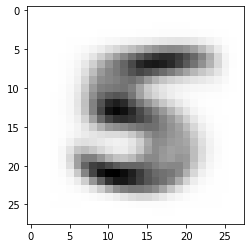

In [61]:
plt.imshow(generated.reshape(28,28), cmap=plt.cm.Greys)
plt.show()

*We can generate a bunch of numbers*

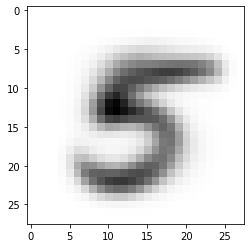

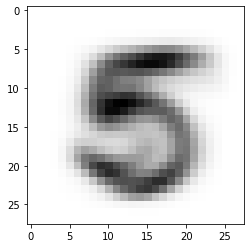

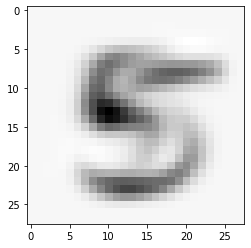

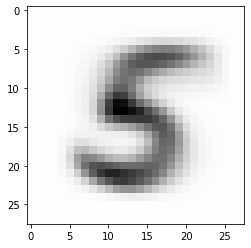

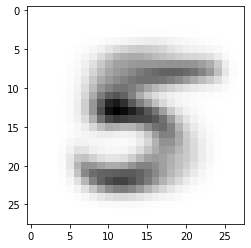

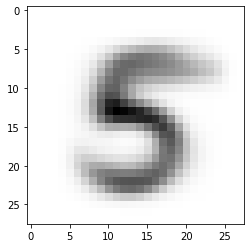

In [64]:
for i in range(6):
    noise = np.random.randn(P)
    sigmas = noise * np.sqrt(pca.singular_values_)
    generated = pca.mean_ + pca.components_.T.dot(sigmas)
    plt.imshow(generated.reshape(28,28), cmap=plt.cm.Greys)
    plt.show()

**Are all the generated numbers indistinguishable from the original numbers? What may be the reason?**

*They look like 5 but we can still tell the difference from the original ones. One explanation that was often provided is that we only used 50% of the variance. Let's try to model 100% of the variance.*

In [66]:
P = X_mnist.shape[1]
pca = PCA(n_components=P)
fives_reduced = pca.fit_transform(fives)

In [68]:
pca.explained_variance_ratio_.sum()

1.0

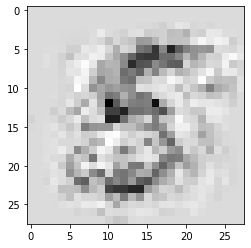

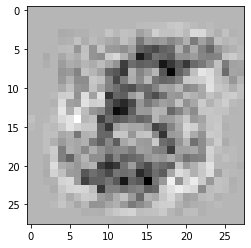

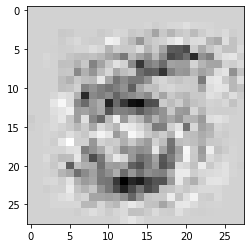

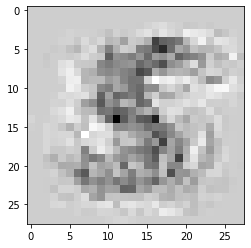

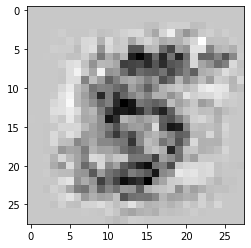

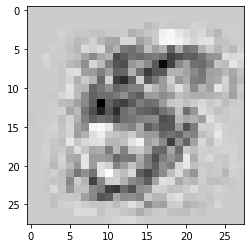

In [70]:
for i in range(6):
    noise = np.random.randn(P)
    sigmas = noise * np.sqrt(pca.singular_values_)
    generated = pca.mean_ + pca.components_.T.dot(sigmas)
    plt.imshow(generated.reshape(28,28), cmap=plt.cm.Greys)
    plt.show()

*This is actually much worse! What is happening is we are overfitting the data -- I told you it could happen even in unsupervised learning. This is actually why I asked you to limit the variance to 50%, even though I did not explain why in order not to over-complicate things from the beginning.*

*Here, the real explanation is that PCA can simply model linear relations, and in this dataset relations between pixels are actually very non linear, as evidenced by the better visualization produced by t-SNE. What we could do is introduce some non linearity using for instance a kernalized version of PCA. However, PCA is not really the best tool for this job even with kernels. Deep learning models such as variational auto-encoders would be better suited, but this is a bit too advanced for now. By the way, variational auto-encoders and t-SNE both rely on KL divergence. I told you this was a useful concept!*

*In case you are highly motivated to still try to understand variational auto-encoders, here is an amazing blog post on the topic: https://jaan.io/what-is-variational-autoencoder-vae-tutorial/ (but be warned, this may be a bit hard to digest for now.)*